In [59]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [60]:
ticker = 'BAT-USD'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [61]:
log_returns= np.log(1 + data.pct_change())

In [62]:
log_returns.tail()

,BAT-USD
Date,
2021-02-08,0.024354
2021-02-09,0.035862
2021-02-10,0.018681
2021-02-11,0.294381
2021-02-12,0.030801


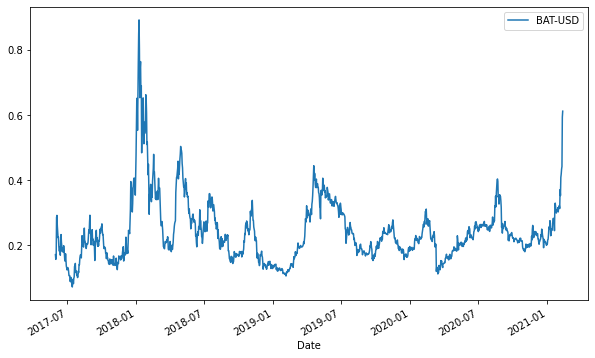

In [63]:
data.plot(figsize=(10,6));

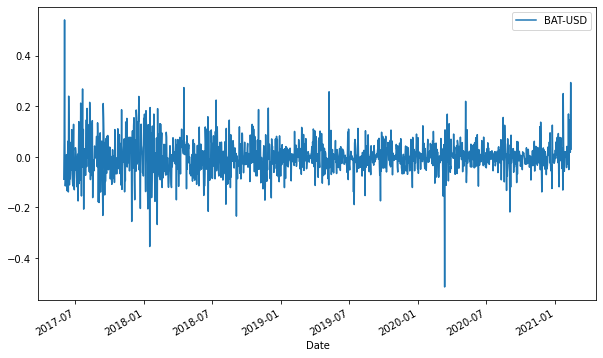

In [64]:
log_returns.plot(figsize=(10,6))
plt.show()

In [65]:
u = log_returns.mean()
u

BAT-USD    0.000945
dtype: float64

In [66]:
var = log_returns.var()
var

BAT-USD    0.005059
dtype: float64

In [67]:
drift = u- (0.5 * var)
drift

BAT-USD   -0.001584
dtype: float64

In [68]:
stdev = log_returns.std()
stdev

BAT-USD    0.071125
dtype: float64

2.nd part

In [69]:
type(drift)

pandas.core.series.Series

In [70]:
type(stdev)

pandas.core.series.Series

In [71]:
np.array(drift)

array([-0.00158393])

In [72]:
drift.values

array([-0.00158393])

In [73]:
stdev.values

array([0.07112468])

In [74]:
norm.ppf(0.95)

1.6448536269514722

In [75]:
x = np.random.rand(10,2)
x

array([[0.82204353, 0.32459493],
       [0.43318014, 0.05302051],
       [0.25087618, 0.28597234],
       [0.75608965, 0.63091141],
       [0.23184351, 0.5832601 ],
       [0.35164268, 0.88819199],
       [0.74003258, 0.69496607],
       [0.7144682 , 0.39177157],
       [0.54051028, 0.47005276],
       [0.39521688, 0.77964377]])

In [76]:
norm.ppf(x)

array([[ 0.92318091, -0.45488793],
       [-0.16828347, -1.61624656],
       [-0.67173509, -0.56518978],
       [ 0.69377917,  0.33426821],
       [-0.73278917,  0.21024073],
       [-0.38088935,  1.21696898],
       [ 0.64344585,  0.5099766 ],
       [ 0.56648577, -0.27470468],
       [ 0.10171935, -0.07513723],
       [-0.26574739,  0.77099068]])

In [77]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.16359488, -0.61865204],
       [-0.61848215, -0.85409523],
       [-0.10411598,  0.62670871],
       [-0.5063443 ,  0.51705932],
       [-0.7834916 ,  0.38671212],
       [ 2.81098841, -0.33042143],
       [-0.33800278,  1.32099625],
       [ 0.60452083,  1.13638027],
       [ 1.78852351,  1.53970696],
       [ 0.51505514,  1.26560936]])

In [78]:
t_intervals = 365
iterations = 100

In [79]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))

In [80]:
daily_returns

array([[1.05382342, 0.90171967, 1.00969027, ..., 0.97573173, 0.93400306,
        0.88978077],
       [0.89921225, 1.01326984, 0.98099795, ..., 1.02222537, 1.02319179,
        0.91986436],
       [1.01923421, 1.00171902, 0.89579349, ..., 0.99688517, 1.02151075,
        0.97073726],
       ...,
       [1.01470849, 0.86342175, 1.02733724, ..., 1.0635636 , 0.98007303,
        0.92749007],
       [1.01012226, 1.03871811, 1.06894414, ..., 1.08183248, 0.94182576,
        0.90024765],
       [1.11586568, 0.96517572, 0.94597959, ..., 0.9796694 , 0.98358016,
        0.96818874]])

3rd part


In [81]:
S0 = data.iloc[-1]
S0

BAT-USD    0.611741
Name: 2021-02-12 00:00:00, dtype: float64

In [82]:
price_list = np.zeros_like(daily_returns)

In [83]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
price_list[0] = S0
price_list

array([[0.61174119, 0.61174119, 0.61174119, ..., 0.61174119, 0.61174119,
        0.61174119],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [85]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

In [86]:
price_list

array([[0.61174119, 0.61174119, 0.61174119, ..., 0.61174119, 0.61174119,
        0.61174119],
       [0.55008517, 0.61985889, 0.60011685, ..., 0.62533736, 0.62592856,
        0.56271891],
       [0.56066562, 0.62092444, 0.53758076, ..., 0.62338954, 0.63939275,
        0.54625221],
       ...,
       [0.0888969 , 0.0710441 , 0.0177561 , ..., 1.88880159, 0.8854322 ,
        0.29346907],
       [0.08979674, 0.0737948 , 0.01898028, ..., 2.04336692, 0.83392286,
        0.26419484],
       [0.1002011 , 0.07122495, 0.01795495, ..., 2.00182405, 0.82022998,
        0.25579047]])

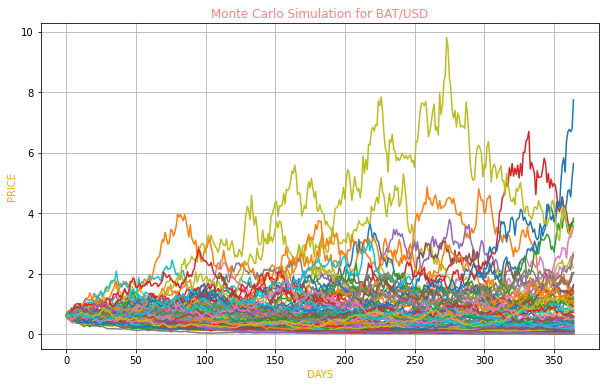

In [87]:
plt.figure(figsize=(10,6))
plt.plot(price_list) 
plt.grid(True)
plt.xlabel('DAYS', color='orange')
plt.ylabel('PRICE', color='orange')
plt.title('Monte Carlo Simulation for BAT/USD',color='#FF8484')
plt.show()